In [1]:
##############################################
# IMPORT DEPENDENCIES
##############################################
import pandas as pd
import sklearn
import matplotlib.pyplot as plt
import numpy as np
import dask.dataframe as dd

/tmp/ipykernel_1125/4021514702.py:8: DeprecationWarning: The current Dask DataFrame implementation is deprecated. 
In a future release, Dask DataFrame will use new implementation that
contains several improvements including a logical query planning.
The user-facing DataFrame API will remain unchanged.

The new implementation is already available and can be enabled by
installing the dask-expr library:

    $ pip install dask-expr

and turning the query planning option on:

    >>> import dask
    >>> dask.config.set({'dataframe.query-planning': True})
    >>> import dask.dataframe as dd

API documentation for the new implementation is available at
https://docs.dask.org/en/stable/dask-expr-api.html

Any feedback can be reported on the Dask issue tracker
https://github.com/dask/dask/issues 

  import dask.dataframe as dd


In [2]:
flight_data = pd.read_csv("/mnt/c/Users/migue/Desktop/MachineLearning/python/FinalProject/flights_sample_3m.csv")

In [3]:
airport_data = pd.read_csv("/mnt/c/Users/migue/Desktop/MachineLearning/python/FinalProject/iata-icao.csv")

In [4]:
flight_data.head(1)

,FL_DATE,AIRLINE,AIRLINE_DOT,AIRLINE_CODE,DOT_CODE,FL_NUMBER,ORIGIN,ORIGIN_CITY,DEST,DEST_CITY,...,DIVERTED,CRS_ELAPSED_TIME,ELAPSED_TIME,AIR_TIME,DISTANCE,DELAY_DUE_CARRIER,DELAY_DUE_WEATHER,DELAY_DUE_NAS,DELAY_DUE_SECURITY,DELAY_DUE_LATE_AIRCRAFT
0,2019-01-09,United Air Lines Inc.,United Air Lines Inc.: UA,UA,19977,1562,FLL,"Fort Lauderdale, FL",EWR,"Newark, NJ",...,0.0,186.0,176.0,153.0,1065.0,NaN,NaN,NaN,NaN,NaN


In [5]:
airport_data.head(1)

,country_code,region_name,iata,icao,airport,latitude,longitude
0,AE,Abu Zaby,AAN,OMAL,Al Ain International Airport,24.2617,55.6092


In [6]:
airport_data.drop(columns=airport_data.columns.difference(['iata', 'latitude', 'longitude']), inplace=True)

In [7]:
# Merge flight_data with airport_data for origin airport
flight_data = flight_data.merge(airport_data, left_on='ORIGIN', right_on='iata', how='left')

# Rename columns to indicate origin airport latitude and longitude
flight_data = flight_data.rename(columns={'latitude': 'origin_latitude', 'longitude': 'origin_longitude'})

# Merge flight_data with airport_data for destination airport
flight_data = flight_data.merge(airport_data, left_on='DEST', right_on='iata', how='left')

# Rename columns to indicate destination airport latitude and longitude
flight_data = flight_data.rename(columns={'latitude': 'dest_latitude', 'longitude': 'dest_longitude'})

# Drop unnecessary columns (iata_x and iata_y)
flight_data.drop(columns=['iata_x', 'iata_y'], inplace=True)

In [8]:
flight_data.head(12)

,FL_DATE,AIRLINE,AIRLINE_DOT,AIRLINE_CODE,DOT_CODE,FL_NUMBER,ORIGIN,ORIGIN_CITY,DEST,DEST_CITY,...,DISTANCE,DELAY_DUE_CARRIER,DELAY_DUE_WEATHER,DELAY_DUE_NAS,DELAY_DUE_SECURITY,DELAY_DUE_LATE_AIRCRAFT,origin_latitude,origin_longitude,dest_latitude,dest_longitude
0,2019-01-09,United Air Lines Inc.,United Air Lines Inc.: UA,UA,19977,1562,FLL,"Fort Lauderdale, FL",EWR,"Newark, NJ",...,1065.0,NaN,NaN,NaN,NaN,NaN,26.0726,-80.1527,40.6925,-74.1686
1,2022-11-19,Delta Air Lines Inc.,Delta Air Lines Inc.: DL,DL,19790,1149,MSP,"Minneapolis, MN",SEA,"Seattle, WA",...,1399.0,NaN,NaN,NaN,NaN,NaN,44.8820,-93.2218,47.4490,-122.3090
2,2022-07-22,United Air Lines Inc.,United Air Lines Inc.: UA,UA,19977,459,DEN,"Denver, CO",MSP,"Minneapolis, MN",...,680.0,NaN,NaN,NaN,NaN,NaN,39.8617,-104.6730,44.8820,-93.2218
3,2023-03-06,Delta Air Lines Inc.,Delta Air Lines Inc.: DL,DL,19790,2295,MSP,"Minneapolis, MN",SFO,"San Francisco, CA",...,1589.0,0.0,0.0,24.0,0.0,0.0,44.8820,-93.2218,37.6190,-122.3750
4,2020-02-23,Spirit Air Lines,Spirit Air Lines: NK,NK,20416,407,MCO,"Orlando, FL",DFW,"Dallas/Fort Worth, TX",...,985.0,NaN,NaN,NaN,NaN,NaN,28.4294,-81.3090,32.8968,-97.0380
5,2019-07-31,Southwest Airlines Co.,Southwest Airlines Co.: WN,WN,19393,665,DAL,"Dallas, TX",OKC,"Oklahoma City, OK",...,181.0,141.0,0.0,0.0,0.0,0.0,32.8471,-96.8518,35.3931,-97.6007
6,2023-06-11,American Airlines Inc.,American Airlines Inc.: AA,AA,19805,2134,DCA,"Washington, DC",BOS,"Boston, MA",...,399.0,NaN,NaN,NaN,NaN,NaN,38.8522,-77.0378,42.3643,-71.0052
7,2019-07-08,Republic Airline,Republic Airline: YX,YX,20452,4464,HSV,"Huntsville, AL",DCA,"Washington, DC",...,613.0,0.0,0.0,23.0,0.0,0.0,34.6372,-86.7751,38.8522,-77.0378
8,2023-02-12,Spirit Air Lines,Spirit Air Lines: NK,NK,20416,590,IAH,"Houston, TX",LAX,"Los Angeles, CA",...,1379.0,NaN,NaN,NaN,NaN,NaN,29.9844,-95.3414,33.9425,-118.4080
9,2020-08-22,Alaska Airlines Inc.,Alaska Airlines Inc.: AS,AS,19930,223,SEA,"Seattle, WA",FAI,"Fairbanks, AK",...,1533.0,NaN,NaN,NaN,NaN,NaN,47.4490,-122.3090,64.8151,-147.8560


## Engineer our DateTime Features

In [9]:
dep_delay=flight_data["DEP_DELAY"].value_counts()

arr_delay=flight_data["ARR_DELAY"].value_counts()


## Analyzing Mean, Median and IQR
Mean: The mean is the average of all values in the data. It's calculated by summing all the values and dividing by the total number of values.

Median: The median is the value that lies in the middle of a set of ordered data. If the number of observations is odd, the median is simply the value at the middle position. If the number of observations is even, the median is the average of the two middle values.

Quartiles (Q1 and Q3): Quartiles are the three values that divide an ordered set of data into four equal parts. The first quartile (Q1) is the value that's at the 25th percentile of the data when sorted from smallest to largest. The third quartile (Q3) is the value that's at the 75th percentile.

Interquartile Range (IQR): The interquartile range is the difference between the third quartile (Q3) and the first quartile (Q1). It's used to measure the spread of the data and is a measure of variability in the data. A larger IQR indicates greater spread in the data.

<BarContainer object of 1527 artists>

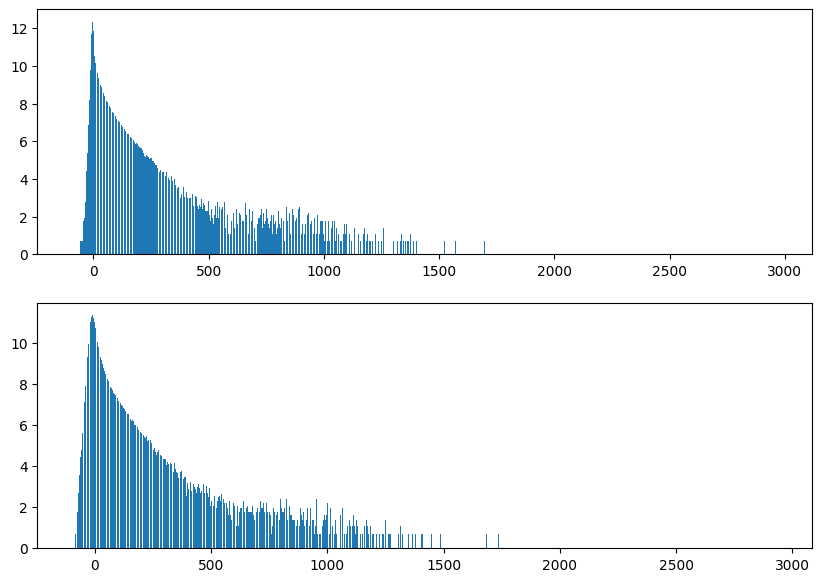

In [10]:
fig, ax = plt.subplots(nrows=2, ncols=1, figsize=(10, 7))
ax[0].bar(dep_delay.index, np.log(dep_delay))
ax[1].bar(arr_delay.index, np.log(arr_delay))


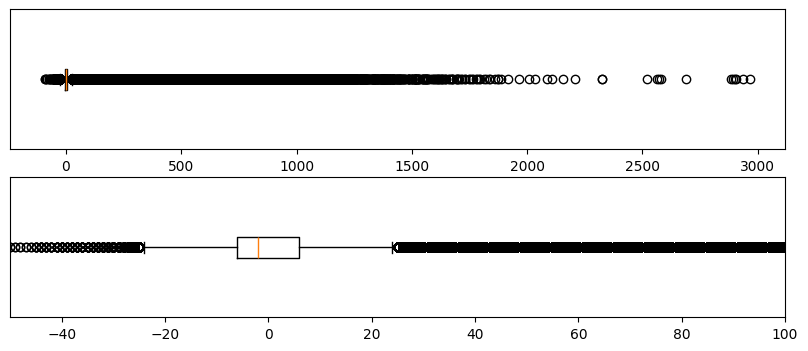

mean 10.123326179288219
median -2.0
q1 -6.0
q3 6.0
iqr 12.0


In [11]:
fig, ax = plt.subplots(nrows=2, ncols=1, figsize=(10, 4))
ax[0].boxplot(flight_data["DEP_DELAY"].dropna(), vert=False)
ax[0].axes.get_yaxis().set_visible(False)
ax[1].boxplot(flight_data["DEP_DELAY"].dropna(), vert=False)
ax[1].axes.get_yaxis().set_visible(False)
ax[1].set_xlim(-50, 100)  # Por ejemplo, aquí establecemos los límites del eje x de -50 a 100
plt.show()

mean = np.mean(flight_data["DEP_DELAY"].dropna())
median = np.median(flight_data["DEP_DELAY"].dropna())
q1 = np.percentile(flight_data["DEP_DELAY"].dropna(), 25)
q3 = np.percentile(flight_data["DEP_DELAY"].dropna(), 75)
iqr = q3 - q1
print("mean",mean)
print("median",median)
print("q1",q1)
print("q3",q3)
print("iqr",iqr)




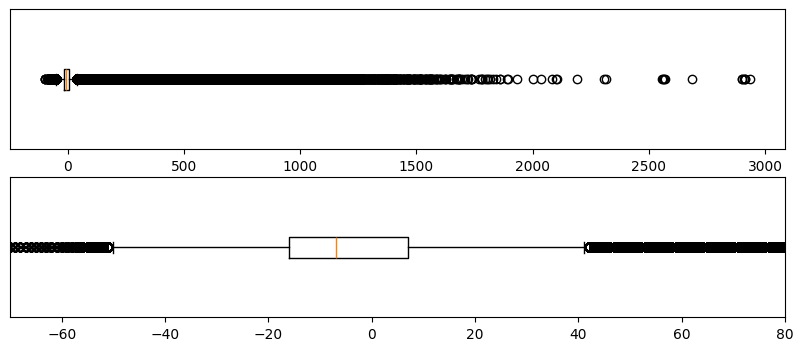

mean 4.260858150279257
median -7.0
q1 -16.0
q3 7.0
iqr 23.0


In [12]:
fig, ax = plt.subplots(nrows=2, ncols=1, figsize=(10, 4))
ax[0].boxplot(flight_data["ARR_DELAY"].dropna(), vert=False)
ax[0].axes.get_yaxis().set_visible(False)
ax[1].boxplot(flight_data["ARR_DELAY"].dropna(), vert=False)
ax[1].axes.get_yaxis().set_visible(False)
ax[1].set_xlim(-70, 80)  # Por ejemplo, aquí establecemos los límites del eje x de -50 a 100
plt.show()

mean = np.mean(flight_data["ARR_DELAY"].dropna())
median = np.median(flight_data["ARR_DELAY"].dropna())
q1 = np.percentile(flight_data["ARR_DELAY"].dropna(), 25)
q3 = np.percentile(flight_data["ARR_DELAY"].dropna(), 75)
iqr = q3 - q1
print("mean",mean)
print("median",median)
print("q1",q1)
print("q3",q3)
print("iqr",iqr)



As we can see, when we analyze arriving delay, we have a more disperse data than the departing delay. 
The IQR is 23, while in the previous analysis we had an IQR of 12. 
On the other hand, the mean is 4.2, which is slower than the one found in the departing delay.

In [13]:
# Seleccionar solo las columnas numéricas en flight_data
exclude_cols = ["DEP_DELAY","TAXI_OUT","TAXI_IN","ARR_DELAY","CRS_ELAPSED_TIME","ELAPSED_TIME","AIR_TIME","DISTANCE","DELAY_DUE_CARRIER","DELAY_DUE_WEATHER","DELAY_DUE_NAS","DELAY_DUE_SECURITY","DELAY_DUE_LATE_AIRCRAFT"]
cols_to_convert = flight_data.columns.difference(exclude_cols)
flight_data[cols_to_convert] = flight_data[cols_to_convert].apply(lambda x: pd.Categorical(x))
flight_data_num = flight_data.select_dtypes(include="number")

# Calcular la matriz de correlación
corr = flight_data_num.corr()

# Obtener la correlación entre "ARR_DELAY" y "DEP_DELAY"
correlation_arr_dep_delay = corr.loc["ARR_DELAY", "DEP_DELAY"]

print("Correlation between ARR_DELAY and DEP_DELAY:", correlation_arr_dep_delay)

Correlation between ARR_DELAY and DEP_DELAY: 0.9648050237637609


In [14]:
corr.style.background_gradient(cmap="coolwarm").format(precision=2)

,DEP_DELAY,TAXI_OUT,TAXI_IN,ARR_DELAY,CRS_ELAPSED_TIME,ELAPSED_TIME,AIR_TIME,DISTANCE,DELAY_DUE_CARRIER,DELAY_DUE_WEATHER,DELAY_DUE_NAS,DELAY_DUE_SECURITY,DELAY_DUE_LATE_AIRCRAFT
DEP_DELAY,1.00,0.05,0.02,0.96,0.02,0.03,0.02,0.02,0.68,0.29,0.13,0.02,0.52
TAXI_OUT,0.05,1.00,0.03,0.19,0.08,0.19,0.06,0.04,-0.06,0.04,0.29,-0.01,-0.10
TAXI_IN,0.02,0.03,1.00,0.11,0.10,0.17,0.08,0.07,-0.04,0.00,0.22,-0.01,-0.05
ARR_DELAY,0.96,0.19,0.11,1.00,-0.00,0.05,0.02,0.00,0.68,0.30,0.22,0.02,0.50
CRS_ELAPSED_TIME,0.02,0.08,0.10,-0.00,1.00,0.98,0.99,0.98,0.01,-0.02,0.04,0.00,-0.03
ELAPSED_TIME,0.03,0.19,0.17,0.05,0.98,1.00,0.99,0.97,-0.02,-0.02,0.15,-0.00,-0.07
AIR_TIME,0.02,0.06,0.08,0.02,0.99,0.99,1.00,0.98,-0.00,-0.02,0.06,0.00,-0.05
DISTANCE,0.02,0.04,0.07,0.00,0.98,0.97,0.98,1.00,0.01,-0.03,0.03,0.00,-0.03
DELAY_DUE_CARRIER,0.68,-0.06,-0.04,0.68,0.01,-0.02,-0.00,0.01,1.00,-0.04,-0.09,-0.01,-0.06
DELAY_DUE_WEATHER,0.29,0.04,0.00,0.30,-0.02,-0.02,-0.02,-0.03,-0.04,1.00,-0.01,-0.00,-0.02


In [15]:
delay=flight_data[["ARR_DELAY","DEP_DELAY"]]
run_after_delay = delay[(delay["DEP_DELAY"]>0)&((delay["ARR_DELAY"]<=0)|(delay["ARR_DELAY"]<delay["DEP_DELAY"]))]
print("There are ",len(delay[delay["DEP_DELAY"]>0])," delayed flights, from which ",len(run_after_delay)," speeded up during the flight to try to arrive in time, which means a ",(len(run_after_delay))*100/(len(delay[delay["DEP_DELAY"]>0])),"% of the times")

There are  992843  delayed flights, from which  715042  speeded up during the flight to try to arrive in time, which means a  72.01964459637627 % of the times


In [16]:
print("Correlation between arriving delay and distance",corr.loc["ARR_DELAY","DISTANCE"])
print("Correlation between departing delay and distance",corr.loc["DEP_DELAY","DISTANCE"])
print("Correlation between distance delay and a delay coused by weather",corr.loc["DELAY_DUE_WEATHER","DISTANCE"])


Correlation between arriving delay and distance 0.0018838368862803526
Correlation between departing delay and distance 0.022135811026361814
Correlation between distance delay and a delay coused by weather -0.02558836232618227


## Let's create some new variables

In [25]:
flight_data["TOTAL_DELAY"]=flight_data["ELAPSED_TIME"]-flight_data["CRS_ELAPSED_TIME"]
flight_data[["TOTAL_DELAY","DISTANCE"]].head(10)

correlation_totaldelay_distance = flight_data[["TOTAL_DELAY", "DISTANCE"]].corr()
correlation_totaldelay_distance


,TOTAL_DELAY,DISTANCE
TOTAL_DELAY,1.000000,-0.072833
DISTANCE,-0.072833,1.000000


### As we can appreciate, the longer the flight is, the better recovery the flight has

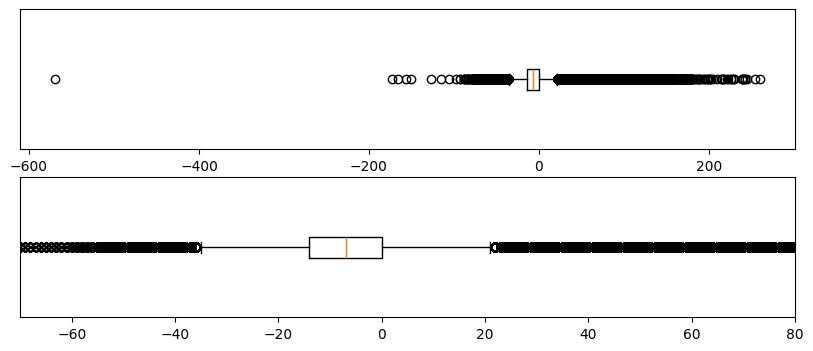

mean 4.260858150279257
median -7.0
q1 -16.0
q3 7.0
iqr 23.0


In [18]:
fig, ax = plt.subplots(nrows=2, ncols=1, figsize=(10, 4))
ax[0].boxplot(flight_data["TOTAL_DELAY"].dropna(), vert=False)
ax[0].axes.get_yaxis().set_visible(False)
ax[1].boxplot(flight_data["TOTAL_DELAY"].dropna(), vert=False)
ax[1].axes.get_yaxis().set_visible(False)
ax[1].set_xlim(-70, 80)  
plt.show()

mean = np.mean(flight_data["ARR_DELAY"].dropna())
median = np.median(flight_data["ARR_DELAY"].dropna())
q1 = np.percentile(flight_data["ARR_DELAY"].dropna(), 25)
q3 = np.percentile(flight_data["ARR_DELAY"].dropna(), 75)
iqr = q3 - q1
print("mean",mean)
print("median",median)
print("q1",q1)
print("q3",q3)
print("iqr",iqr)

In [19]:
data = flight_data[["CRS_ELAPSED_TIME","ELAPSED_TIME","DEP_DELAY","ARR_DELAY"]]
print(data.head(5))
print("Correlation between distance and CRS elapsed time",corr.loc["CRS_ELAPSED_TIME","DISTANCE"])

   CRS_ELAPSED_TIME  ELAPSED_TIME  DEP_DELAY  ARR_DELAY
0             186.0         176.0       -4.0      -14.0
1             235.0         236.0       -6.0       -5.0
2             118.0         112.0        6.0        0.0
3             260.0         285.0       -1.0       24.0
4             181.0         182.0       -2.0       -1.0
Correlation between distance and CRS elapsed time 0.9824540151559722


## Analyzing the data


We will see where we find NA or NaN values

Should we change 'NaN' to '0'?

In [37]:
flight_data[flight_data["DEP_DELAY"].isnull()]
flight_data[flight_data["DEP_DELAY"]==0].head(5)

,FL_DATE,AIRLINE,AIRLINE_DOT,AIRLINE_CODE,DOT_CODE,FL_NUMBER,ORIGIN,ORIGIN_CITY,DEST,DEST_CITY,...,DELAY_DUE_CARRIER,DELAY_DUE_WEATHER,DELAY_DUE_NAS,DELAY_DUE_SECURITY,DELAY_DUE_LATE_AIRCRAFT,origin_latitude,origin_longitude,dest_latitude,dest_longitude,TOTAL_DELAY
23,2022-09-06,American Airlines Inc.,American Airlines Inc.: AA,AA,19805,1754,DFW,"Dallas/Fort Worth, TX",PNS,"Pensacola, FL",...,NaN,NaN,NaN,NaN,NaN,32.8968,-97.0380,30.4734,-87.1866,6.0
28,2022-03-06,JetBlue Airways,JetBlue Airways: B6,B6,20409,406,FLL,"Fort Lauderdale, FL",EWR,"Newark, NJ",...,NaN,NaN,NaN,NaN,NaN,26.0726,-80.1527,40.6925,-74.1686,-8.0
144,2019-02-02,Allegiant Air,Allegiant Air: G4,G4,20368,883,GRR,"Grand Rapids, MI",PIE,"St. Petersburg, FL",...,NaN,NaN,NaN,NaN,NaN,42.8808,-85.5228,27.9102,-82.6874,-7.0
206,2021-03-02,SkyWest Airlines Inc.,SkyWest Airlines Inc.: OO,OO,20304,4052,ORD,"Chicago, IL",DTW,"Detroit, MI",...,NaN,NaN,NaN,NaN,NaN,41.9786,-87.9047,42.2125,-83.3533,-4.0
231,2021-03-29,American Airlines Inc.,American Airlines Inc.: AA,AA,19805,1533,PHL,"Philadelphia, PA",MIA,"Miami, FL",...,NaN,NaN,NaN,NaN,NaN,39.8719,-75.2411,25.7932,-80.2906,-5.0


In [21]:
flight_data.head(4)
flight_data[(flight_data["FL_NUMBER"]==1562)&(flight_data["AIRLINE_CODE"]=='UA')].head(3)

,FL_DATE,AIRLINE,AIRLINE_DOT,AIRLINE_CODE,DOT_CODE,FL_NUMBER,ORIGIN,ORIGIN_CITY,DEST,DEST_CITY,...,DELAY_DUE_CARRIER,DELAY_DUE_WEATHER,DELAY_DUE_NAS,DELAY_DUE_SECURITY,DELAY_DUE_LATE_AIRCRAFT,origin_latitude,origin_longitude,dest_latitude,dest_longitude,TOTAL_DELAY
0,2019-01-09,United Air Lines Inc.,United Air Lines Inc.: UA,UA,19977,1562,FLL,"Fort Lauderdale, FL",EWR,"Newark, NJ",...,NaN,NaN,NaN,NaN,NaN,26.0726,-80.1527,40.6925,-74.1686,-10.0
46814,2019-04-05,United Air Lines Inc.,United Air Lines Inc.: UA,UA,19977,1562,ANC,"Anchorage, AK",ORD,"Chicago, IL",...,NaN,NaN,NaN,NaN,NaN,61.1744,-149.9960,41.9786,-87.9047,-16.0
96722,2019-02-07,United Air Lines Inc.,United Air Lines Inc.: UA,UA,19977,1562,FLL,"Fort Lauderdale, FL",EWR,"Newark, NJ",...,0.0,0.0,157.0,0.0,0.0,26.0726,-80.1527,40.6925,-74.1686,-20.0


## Features:
 0-FL_DATE-->category---- not relevant, could drop it as we don't really care about the date of the flight

 1-AIRLINE-->category---- it is interesting, we could keep it, although we algo have the "AIRLINE_DOT", "DOT_CODE" and "AIRLINE_CODE". They all mean the same, so we could use 'AIRLINE_CODE' or 'DOT_CODE'

 2-AIRLINE_DOT-->category---- it is interesting, we could keep it, although we algo have the "AIRLINE_DOT", "DOT_CODE" and "AIRLINE_CODE". They all mean the same, so we could use 'AIRLINE_CODE' or 'DOT_CODE'

 3-AIRLINE_CODE-->category---- it is interesting, we could keep it, although we algo have the "AIRLINE_DOT", "DOT_CODE" and "AIRLINE_CODE". They all mean the same, so we could use 'AIRLINE_CODE' or 'DOT_CODE'

 4-DOT_CODE-->category---- it is interesting, we could keep it, although we algo have the "AIRLINE_DOT", "DOT_CODE" and "AIRLINE_CODE". They all mean the same, so we could use 'AIRLINE_CODE' or 'DOT_CODE'

 5-FL_NUMBER-->category---- I think we could drop this variable, it does not give much information, they change all the time as we can see in the previous code line. Even the same airline with the same flight number does not represent the same route

 6-ORIGIN-->category---- we could use either 'ORIGIN_CITY' or 'ORIGIN'. They mean the same so we can drop one of them

 7-ORIGIN_CITY-->category---- we could use either 'ORIGIN_CITY' or 'ORIGIN'. They mean the same so we can drop one of them

 8-DEST-->category---- we could use either 'DEST_CITY' or 'DEST'. They mean the same so we can drop one of them

 9-DEST_CITY-->category---- we could use either 'DEST_CITY' or 'DEST'. They mean the same so we can drop one of them

 10-CRS_DEP_TIME-->category---- it could be interesting if we want to find any correlation between departing time and delays, maybe at some times the conditions might be worse

 11-DEP_TIME-->category---- if we keep DEP_DELAY, we don't really need this variable

 12-DEP_DELAY-->float64---- it is the result of subtracting the two previous variables

 13-TAXI_OUT-->float64---- keep it (TRIED TO UNDERSTAND THE MEANING BUT COULDN'T)

 14-WHEELS_OFF-->category---- keep it (TRIED TO UNDERSTAND THE MEANING BUT COULDN'T)

 15-WHEELS_ON-->category---- keep it (TRIED TO UNDERSTAND THE MEANING BUT COULDN'T)

 16-TAXI_IN-->float64---- keep it (TRIED TO UNDERSTAND THE MEANING BUT COULDN'T)

 17-CRS_ARR_TIME-->category---- keep it

 18-ARR_TIME-->category---- keep it

 19-ARR_DELAY-->float64---- keep it

 20-CANCELLED-->category---- keep it although if there is a cancellation code, we could dro this variable as it is redundant 

 21-CANCELLATION_CODE-->category---- keep it and we can add another variable https://ansperformance.eu/library/iata-delay-codes.pdf

 22-DIVERTED-->category---- keep it (to see if the delay might be coused by this)

 23-CRS_ELAPSED_TIME-->float64---- keep it 

 24-ELAPSED_TIME-->float64---- keep it 

 25-AIR_TIME-->float64---- keep it 

 26-DISTANCE-->float64---- keep it

 27-DELAY_DUE_CARRIER-->float64---- keep it

 28-DELAY_DUE_WEATHER-->float64---- keep it

 29-DELAY_DUE_NAS-->float64---- keep it

 30-DELAY_DUE_SECURITY-->float64---- keep it

 31-DELAY_DUE_LATE_AIRCRAFT-->float64---- keep it

 32-origin_latitude-->category---- keep it

 33-origin_longitude-->category---- keep it

 34-dest_latitude-->category---- keep it

 35-dest_longitude-->category---- keep it

 36-TOTAL_DELAY-->float64---- keep it